<a href="https://colab.research.google.com/github/Alia1234567/cyfuture_20214170/blob/master/20214170.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow tensorflow-hub


In [ ]:
import tensorflow as tf
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
import tensorflow_hub as hub


In [ ]:
def load_image(path):
    img = PIL.Image.open(path)
    img = img.resize((512, 512))
    img = np.array(img) / 255.0
    return np.expand_dims(img, axis=0)

In [ ]:
import tensorflow as tf
import numpy as np
from google.colab import files
from PIL import Image

def load_image(image_path):
    img = Image.open(image_path)
    img = img.resize((512, 512))  # Resize for model compatibility
    img = np.array(img) / 255.0  # Normalize pixel values
    img = tf.convert_to_tensor(img, dtype=tf.float32)

    if img.shape[-1] == 4:  # Remove alpha channel if present
        img = img[..., :3]

    img = tf.expand_dims(img, axis=0)  # Add batch dimension
    return img

print("Upload Content Image:")
content_path = files.upload()
content_img = load_image(list(content_path.keys())[0])

print("Upload Style Image:")
style_path = files.upload()
style_img = load_image(list(style_path.keys())[0])


Upload Content Image:


Saving Screenshot 2025-01-11 215023.png to Screenshot 2025-01-11 215023.png
Upload Style Image:


Saving Screenshot 2024-12-28 160204.png to Screenshot 2024-12-28 160204.png


In [ ]:
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_img = hub_model(tf.constant(content_img), tf.constant(style_img))[0]

In [ ]:
content_img = tf.convert_to_tensor(content_img, dtype=tf.float32)
style_img = tf.convert_to_tensor(style_img, dtype=tf.float32)

stylized_img = hub_model(content_img, style_img)[0]


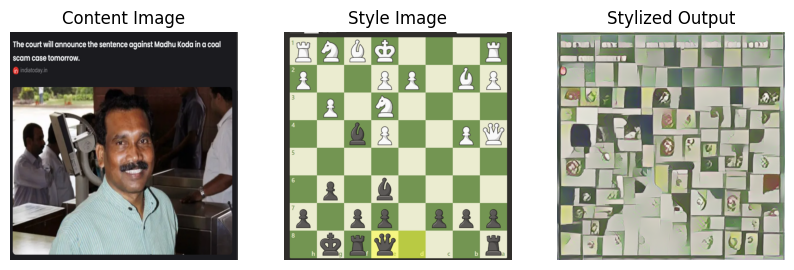

In [ ]:
def tensor_to_image(tensor):
    tensor = tensor[0]  # Remove batch dimension
    tensor = np.clip(tensor * 255, 0, 255).astype(np.uint8)  # Ensure valid pixel range
    return Image.fromarray(tensor)


plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(content_img[0])
plt.title("Content Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(style_img[0])
plt.title("Style Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(tensor_to_image(stylized_img))
plt.title("Stylized Output")
plt.axis("off")

plt.show()